In [46]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd 
import json
from pprintpp import pprint as pprint
mpl.rcParams['font.size'] = 10
mpl.rcParams['figure.figsize'] = (10,8)

In [52]:
#READ INTO DF POPULATION DATA FROM OPEN NYC DATABASE 
with open('../data/population2010_opendatanyc.json') as f:
    json_data = f.read()
    data = json.loads(json_data)['data']
    cols = json.loads(json_data)['meta']['view']['columns']
    cols = [x['fieldName'] for x in cols]

    df = pd.DataFrame(data, columns=cols)
    df.population = [int(x) for x in df.population]

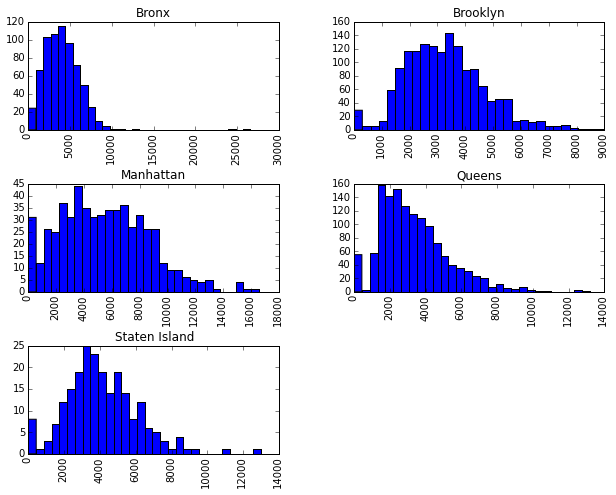

In [55]:
#PLOT DATASET BY BOROUGH
x = df.hist(column='population',by='borough',bins=30)

In [61]:
#READ IN CENSUS ECONOMIC/SOCIAL DATA (5 YR ACS, 2010)
with open("../data/ss10hny.csv") as f:
    census_dat = pd.read_csv(f, sep=',')

###GET COLUMN ABBREVIATION DEFINITIONS FROM THIS URL:
http://api.census.gov/data/2013/acs5/profile/variables.json

DP03_0062M = "Median Household Income, all households"<br>
DP03_0063E = "Mean Household Income, all households"

Using my API key for the Census Bureau, I can get listings for various economic and
social variables using, e.g.,

http://api.census.gov/data/2013/acs5?get=NAME,B01001_001E&for=tract:*&in=state:36&key=641a17d8852c486df8a332c73a53b8aec9ec801a

<strong>Not sure about data above in this cell, the data from the csv file matches this table found in my insight/data directory: PUMSDataDict10.pdf </strong>

FINCP = "Family Income in 2010 dollars" !for non-2010 years use ADJINC factor to adjust to 2010 values.
HINCP = "Household Income in 2010 dollars" - difference with FINCP? 
Answer: FINCP is not always available 

###Yelp API: 
####Console: 
https://www.yelp.com/developers/api_console
####Python: 
https://www.yelp.com/developers/documentation/v2/search_api 
as well as https://github.com/Yelp/yelp-api/tree/master/v2
<br>
term = 'thai' 

sort=1 (by distance)

location = "10025" (zipcode)   OR   
ll=latitude,longitude,[accuracy,altitude,altitude_accuracy] the last three being optional
limit = 40 (max?) 

category_filter = 'restaurant,thai' (searches for categories restaurant and THAI)

radius_filter = 1000 (in meters, max = 40 kilometers)

In [91]:
import argparse
import json
import pprint
import sys
import urllib
import urllib2

import oauth2


API_HOST = 'api.yelp.com'
DEFAULT_TERM = 'dinner'
DEFAULT_LOCATION = 'San Francisco, CA'
SEARCH_LIMIT = 40
SEARCH_PATH = '/v2/search/'
BUSINESS_PATH = '/v2/business/'

# OAuth credential placeholders that must be filled in by users.
CONSUMER_KEY = "ZadBAGjrilu-Ki2dNJDURQ"
CONSUMER_SECRET = "PAlkLzR6M_p_P5hmGqiAyqTN8FY"
TOKEN = "YaVok3jiWu2fmlvEZ2h3AVncYQFDj9Ut"
TOKEN_SECRET = "f6Y8uuWtsNukKwcjZSiwqv5-itQ"


def request(host, path, url_params=None):
    """Prepares OAuth authentication and sends the request to the API.
    Args:
        host (str): The domain host of the API.
        path (str): The path of the API after the domain.
        url_params (dict): An optional set of query parameters in the request.
    Returns:
        dict: The JSON response from the request.
    Raises:
        urllib2.HTTPError: An error occurs from the HTTP request.
    """
    url_params = url_params or {}
    url = 'http://{0}{1}?'.format(host, urllib.quote(path.encode('utf8')))

    consumer = oauth2.Consumer(CONSUMER_KEY, CONSUMER_SECRET)
    oauth_request = oauth2.Request(method="GET", url=url, parameters=url_params)

    oauth_request.update(
        {
            'oauth_nonce': oauth2.generate_nonce(),
            'oauth_timestamp': oauth2.generate_timestamp(),
            'oauth_token': TOKEN,
            'oauth_consumer_key': CONSUMER_KEY
        }
    )
    token = oauth2.Token(TOKEN, TOKEN_SECRET)
    oauth_request.sign_request(oauth2.SignatureMethod_HMAC_SHA1(), consumer, token)
    signed_url = oauth_request.to_url()
    
    print u'Querying {0} ...'.format(url)

    conn = urllib2.urlopen(signed_url, None)
    try:
        response = json.loads(conn.read())
    finally:
        conn.close()

    return response

def search(term, location):
    """Query the Search API by a search term and location.
    Args:
        term (str): The search term passed to the API.
        location (str): The search location passed to the API.
    Returns:
        dict: The JSON response from the request.
    """
    
    url_params = {
        'term': term.replace(' ', '+'),
        'location': location.replace(' ', '+'),
        'limit': SEARCH_LIMIT
#        'sort': 1,
#        'category_filter': category_string
    }
    print url_params
    return request(API_HOST, SEARCH_PATH, url_params=url_params)

def query_api(term, location):
    """Queries the API by the input values from the user.
    Args:
        term (str): The search term to query.
        location (str): The location of the business to query.
    """
    print term, location
    response = search(term, location)

    businesses = response.get('businesses')

    if not businesses:
        print u'No businesses for {0} in {1} found.'.format(term, location)
        return

    business_id = businesses[0]['id']

    print u'{0} businesses found ...'.format(len(businesses))

In [92]:
#GET LIST OF RESTAURANTS WITH THAI FOOD, AND A LIST OF ZIPCODES

ziplist = [10025,10021,10024,10023]

for zipcode in ziplist:
    try:
        query_api("thai", str(zipcode))
    except urllib2.HTTPError as error:
        sys.exit('Encountered HTTP error {0}. Abort program.'.format(error.code))


thai 10025
{'term': 'thai', 'limit': 40, 'location': '10025'}
Querying http://api.yelp.com/v2/search/? ...


SystemExit: Encountered HTTP error 400. Abort program.

To exit: use 'exit', 'quit', or Ctrl-D.


In [82]:
%tb

SystemExit: Encountered HTTP error 400. Abort program.